In [ ]:
!pip install advertools
!pip install datefinder

In [7]:
#importing libraries
import advertools as adv
import pandas as pd
import numpy as np
import datefinder
from datetime import datetime
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


In [35]:
#reading the keywords
yoga_key_list = pd.read_csv('/content/Yoga_Keywords_DS_JR_Evaluation.csv')
yoga_key_list.head(2)

Keyword Local Search Volume (US)  ...    CPC (US) CPC (Global)
0    live online yoga classes                      720  ...        3.33         2.05
1  yoga lessons for beginners                       70  ...  2.23769981   0.84466244

[2 rows x 5 columns]

In [36]:
#converting the 'Global Search Volume' column to integer.
yoga_key_list['Global Search Volume'].unique()

array(['1600', '320', '260', '880', '110', '1000', '1300', '2400', '2900',
       '18100', '10', '390', '50', '9900', '40', '590', '4400', '1900',
       '3600', '720', '480', '170', '90', '30', '140', '33100', '-',
       '27100'], dtype=object)

In [39]:
#Top 50 keywords - sorted (high to low) by the highest Global search volume
yoga_key_list['Global Search Volume'] = yoga_key_list['Global Search Volume'].replace('-', 0)
yoga_key_list['Global Search Volume']=yoga_key_list['Global Search Volume'].astype(int)
yoga_key_list.sort_values(by='Global Search Volume',ascending=False,inplace=True)
yoga_key_list.head(10)

Keyword Local Search Volume (US)  ...    CPC (US) CPC (Global)
57          online yoga class                    12100  ...        3.51   2.29217029
79          yoga online class                    12100  ...  4.95856866         1.79
59        online yoga classes                    12100  ...  4.95856866   2.29217029
62        yoga classes online                    12100  ...        3.51   2.29217029
56          yoga class online                    12100  ...        3.51   2.29217029
81    online classes for yoga                    12100  ...  4.95856866   2.29217029
80        yoga online classes                    12100  ...  4.95856866   2.29217029
135              yoga teacher                     2400  ...  2.52729076         0.85
78     free yoga online class                     9900  ...        2.18   2.10521061
66   free yoga classes online                     9900  ...        2.18   2.10521061

[10 rows x 5 columns]

In [ ]:
#Extracting the data for top 50 keywords sorted by global volumne with geographic location "US"
my_api_key = "API_KEY" #The API_KEY you acquired
my_cse_id = "ENGINE_ID" #The search-engine-ID you created
yoga_data = adv.serp_goog(cx=my_cse_id, key=my_api_key, q=yoga_key_list['Keyword'][0:50].values,gl ='us',num=10)
#saving the result dataframe
yoga_data.to_csv('yoga_data.csv',index=False)

In [47]:
yoga_data.head(2)

num  gl        searchTerms  ...  pinterest:url template s_1stimp
0   10  us  online yoga class  ...            NaN      NaN      NaN
1   10  us  online yoga class  ...            NaN      NaN      NaN

[2 rows x 256 columns]

# 1. Which Domain/website ranks prominently in the search results. 

Creating few new features:

**count**: The number of times the website appeared in the dataset

**avg_rank**: The average rank of the website on whole dataset.

**coverage**: The number of times the domain appeared ÷ the number of unique queries sent.

**rank_importance**: Since the coverage wont reflect actual rank importance of webpage, we have created a weighted importance i.e coverage/avg_rank.

In [53]:
summary = (yoga_data
           .groupby(['displayLink'], as_index=False)
           .agg({'rank': ['count', 'mean']})
           .sort_values(('rank', 'count'), ascending=False)
           .assign(coverage=lambda df: df[('rank', 'count')].div(yoga_data['searchTerms'].nunique())))
summary.columns = ['displayLink', 'count', 'avg_rank', 'coverage']
summary['displayLink'] = summary['displayLink'].str.replace('www.', '')
summary['avg_rank'] = summary['avg_rank'].round(1)
summary['coverage'] = summary['coverage'].mul(100).round(1)#.astype(str).add('%')

summary['rank_importance'] = summary['coverage']/summary['avg_rank']
summary.head(20).reset_index(drop=True)

displayLink  count  avg_rank  coverage  rank_importance
0                 youtube.com     82       4.6     164.0        35.652174
1                  thecut.com     41       2.1      82.0        39.047619
2   corepoweryogaondemand.com     39       5.4      78.0        14.444444
3            doyogawithme.com     34       2.2      68.0        30.909091
4         yogawithadriene.com     31       5.4      62.0        11.481481
5             verywellfit.com     30       4.9      60.0        12.244898
6         seattleyoganews.com     25       7.8      50.0         6.410256
7                popsugar.com     23       7.3      46.0         6.301370
8                    self.com     22       5.5      44.0         8.000000
9                     glo.com     18       6.4      36.0         5.625000
10               greatist.com     18       8.7      36.0         4.137931
11              yourtango.com     16       9.6      32.0         3.333333
12                  nymag.com     14       3.5      28.0         8.000000
13              yogitimes.com     10       6.4      20.0         3.125000
14           yogiapproved.com      9       8.9      18.0         2.022472
15                insider.com      8       5.5      16.0         2.909091
16      glamourmagazine.co.uk      8       9.5      16.0         1.684211
17  thethirty.whowhatwear.com      8       4.6      16.0         3.478261
18      yogainternational.com      7       7.9      14.0         1.772152
19                  doyou.com      4       7.0       8.0         1.142857


*   The above dataframe displays that coverage of youtube is higher, but as we can see the avg rank is lower, which is reflected in rank_importance column.
*   We can see that thecut.com has higher rank importance due to lower ranking which represents that **thecut.com webpage is of higher importance than youtube.com**




In [140]:
top_df = yoga_data[yoga_data['displayLink'].isin(top_domains)]
rank_counts = top_df.groupby(['displayLink', 'rank']).agg({'rank': ['count']}).reset_index()
rank_counts.columns = ['displayLink', 'rank', 'count']
rank_counts = rank_counts.sort_values(by = ['rank'])
rank_counts[(rank_counts['displayLink']=='www.thecut.com') | (rank_counts['displayLink']=='www.youtube.com')].sort_values(by='displayLink')

displayLink  rank  count
32   www.thecut.com     1     27
33   www.thecut.com     2      3
34   www.thecut.com     3      1
35   www.thecut.com     4      6
36   www.thecut.com     5      2
37   www.thecut.com     7      1
38   www.thecut.com     8      1
48  www.youtube.com     1      8
49  www.youtube.com     2      3
50  www.youtube.com     3     14
51  www.youtube.com     4     16
52  www.youtube.com     5     15
53  www.youtube.com     6     11
54  www.youtube.com     7      4
55  www.youtube.com     8      7
56  www.youtube.com     9      4

In the above dataframe, it can be verified that www.thecut.com is of higher importance since it has appeared at rank 1, 27 times out of 50 while youtube.com has appeared at rank 1 only 8 times

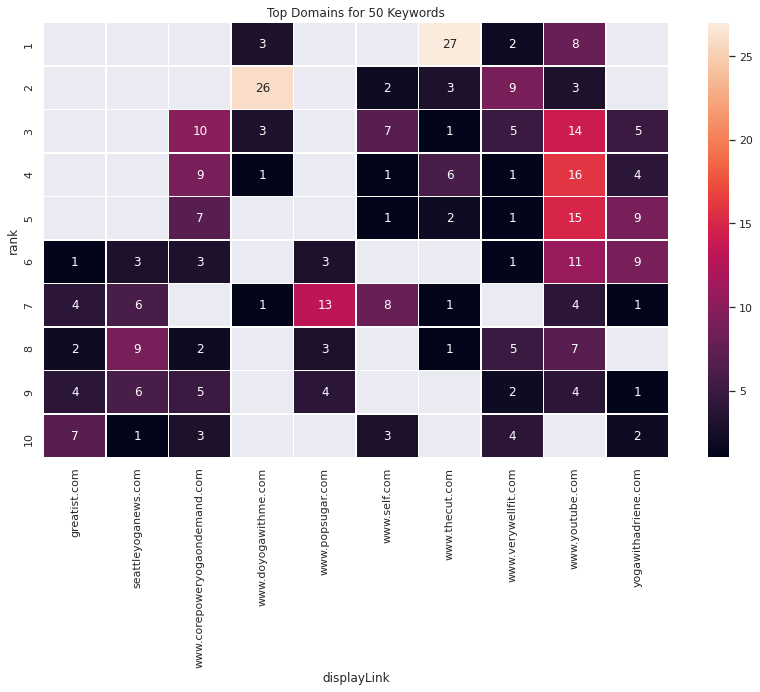

In [260]:
#plotting the heatmap of top 10 webpages
fig, ax = plt.subplots(figsize=(14,8))         # Sample figsize in inches
# Load the example flights dataset and conver to long-form
heatmap_yoga = rank_counts.pivot( "rank", "displayLink","count")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(heatmap_yoga, annot=True, linewidths=.5,ax=ax)
plt.title("Top Domains for 50 Keywords")
plt.show()

The blank spaces here mean that the websites were not present at the corresponding rank i.e count=0.

# 2. Text Analysis - absolute and weighted frequency (From Title, Meta Description).


### Text Analysis from Title 

Creating few new features:

**abs_freq**: The number of times the word has occured in the text.

**wtd_freq_perc**: Weighted frequency in percentage. The weighted frequency takes into considerations the weights, here the impressions.
The google api does not provide the impression data, hence we cannot create a weighted frequency.


In [156]:
title_word_freq = adv.word_frequency(yoga_data['title'], 
                                    rm_words=list(adv.stopwords['english']) + ['-', '', '|', '–', '&'],extra_info = True)
title_word_freq.head(10)

word  abs_freq  abs_perc  abs_perc_cum  wtd_freq_perc  wtd_freq_perc_cum
0     yoga       649  0.195954      0.195954       0.195954           0.195954
1     free       273  0.082428      0.278382       0.082428           0.278382
2   online       262  0.079106      0.357488       0.079106           0.357488
3  classes       207  0.062500      0.419988       0.062500           0.419988
4     best       164  0.049517      0.469505       0.049517           0.469505
5   videos        88  0.026570      0.496075       0.026570           0.496075
6     home        76  0.022947      0.519022       0.022947           0.519022
7   minute        67  0.020229      0.539251       0.020229           0.539251
8  youtube        63  0.019022      0.558273       0.019022           0.558273
9     2020        50  0.015097      0.573370       0.015097           0.573370

We can see that yoga, free and online as the most occuring words, which is expected.

### Text Analysis from Snippet

In [146]:
snippet_word_freq = adv.word_frequency(yoga_data['snippet'], 
                                    rm_words=list(adv.stopwords['english']) + ['-', '','. ','|', '–', '&'])
snippet_word_freq.head(10)

word  abs_freq
0      yoga      1030
1    online       361
2   classes       361
3         ·       324
4      free       296
5      2020       178
6      best       148
7    videos       127
8   adriene       104
9  practice        99

The same pattern follows as title, where yoga, online and classes are most occuring.

# Is there any co-relation between rankings and emojis? What are the most frequently used emojis? Is there a special pattern?


### Emojis in Title

In [160]:
emoji_summary_title = adv.extract_emoji(yoga_data['title'].fillna('').values.tolist())
emoji_summary_title['overview']

{'emoji_per_post': 0.0, 'num_emoji': 0, 'num_posts': 500, 'unique_emoji': 0}

We can see that there are no emojis in the dataset.

### Emojis in Snippet

In [89]:
emoji_summary_snippet = adv.extract_emoji(yoga_data['snippet'].fillna('').values.tolist())
emoji_summary_snippet['overview']

{'emoji_per_post': 0.002, 'num_emoji': 1, 'num_posts': 500, 'unique_emoji': 1}

In [88]:
emoji_summary_snippet['top_emoji']

[('♥', 1)]

We can see that there is only one emoji in the whole dataset, which is expected since the webpages have very low occurences of emoji when compared to youtube titles. therefore we cannot correlate this feature with rank.

# 4. Is there any co-relation of numbers or dates to the ranking? 


*   There is no useful numeric feature in the dataset.

*   The Query date field has only one value since we have quieried only once. If we query the next time i.e periodically, then we can compare for changes in the rank.

*   So we created a new date field i.e the "published date", the date when the webpage was published, we can get this field inside the snippet feature.
*   Not all the snippet contains the publishing date

*   Since there are no numeric features we can try the length of title and webpage as new features.









In [201]:
#finding the publishing date inside snippet
def get_date(sentence):
    x=''
    #sentence = sentence.values[0]
    matches = datefinder.find_dates(sentence)
    print(matches)
    for match in matches:
        x= match
        break
    
    return str(x)[0:10]

In [ ]:
yoga_data['date_published']=yoga_data['snippet'].apply(get_date)

In [233]:
#getting the month, year and semantic date as seperate features for finding the correlation.
def get_month(x):
    if x!='':
        dt = datetime.strptime(x, '%Y-%m-%d')
        return dt.month
    else:
        return 0
def get_year(x):
    if x!='':
        dt = datetime.strptime(x, '%Y-%m-%d')
        return dt.year
    else:
        return 0
def get_date_semantic(x):
    if x!='':
        dt = datetime.strptime(x, '%Y-%m-%d')
        return ((dt.year*10000)+(dt.month*100)+(dt.day))
    else:
        return 0

In [262]:
yoga_data[yoga_data['date_published_year']!=0].shape

(346, 262)

We got almost 346 data points with publishing date

In [234]:
yoga_data['date_published_month']=yoga_data['date_published'].apply(get_month)
yoga_data['date_published_year']=yoga_data['date_published'].apply(get_year)
yoga_data['date_published_semantic']=yoga_data['date_published'].apply(get_date_semantic)

In [161]:
yoga_data['title_length'] = yoga_data['title'].apply(len)
yoga_data['displayLink_length'] = yoga_data['displayLink'].apply(len)

In [237]:
print('The correlation between title length and rank: ',yoga_data['title_length'].corr(yoga_data['rank']))
print('The correlation between displayLink length and rank: ',yoga_data['displayLink_length'].corr(yoga_data['rank']))
print('The correlation between date_published month and rank: ',yoga_data['date_published_month'].corr(yoga_data['rank']))
print('The correlation between date_published year and rank: ',yoga_data['date_published_year'].corr(yoga_data['rank']))
print('The correlation between date_published and rank: ',yoga_data['date_published_semantic'].corr(yoga_data['rank']))

The correlation between title length and rank:  0.11257304338703746
The correlation between displayLink length and rank:  0.047487903850557324
The correlation between date_published month and rank:  -0.07642917528381787
The correlation between date_published year and rank:  -0.019384776701015467
The correlation between date_published and rank:  -0.019387603636108815


We can see that there are no correlation between date or numeric features with rank

**Conclusion:**


1.   We see that thecut.com is the most important webpage/domain in the dataset.
2.   We find that yoga, online, classes are most occuring which is expected
3.   We were not able to find emojis in the data or impression/likes etc features, but we could have found this in youtube data.
4.   We created length of title/snippet and publishing date as a feature but could not find any correlation with rank

